# gray scale

print the image in grayscale 

In [4]:
import numpy as np 
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 
import cv2 
# plt.rcParams['interactive'] == True
# %matplotlib qt

%matplotlib inline

In [2]:
#Read the image 
image = mpimg.imread('E:/Computer-Vision-Nanodegree-master/lesson 2/waymo.jpg')

# Print out the image dimensions 
print('Image dumensions',image.shape)

Image dumensions (183, 275, 3)


In [10]:
gray_image = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

plt.imshow(gray_image ,cmap = 'gray')

In [11]:
x = 190
y = 162
pixel_val = gray_image[y,x]
print(pixel_val)

34


In [3]:
image = cv2.imread('E:/Computer-Vision-Nanodegree-master/lesson 2/pizza.png')

print('the type of the image ',type(image) ,'with dimension',image.shape)

the type of the image  <class 'numpy.ndarray'> with dimension (414, 650, 3)


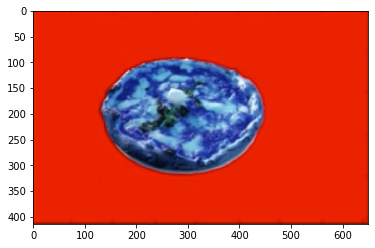

In [5]:
plt.imshow(image) # BGR 

# convert from BGR to RGB

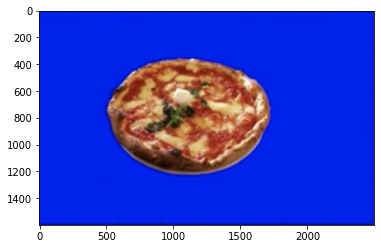

In [102]:
image_copy = np.copy(image)
image_copy = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
image_copye = cv2.resize(image_copy,(2500,1600))
plt.imshow(image_copye)

# Define the color threshold

In [81]:
# define our color selction boundries in RGB values 
lower_blue = np.array([0,0,50])
upper_blue = np.array([50,80,255])

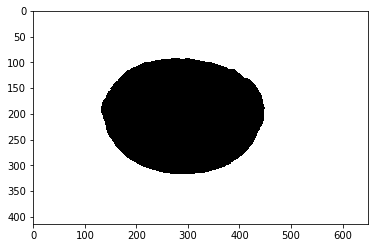

In [82]:
mask = cv2.inRange(image_copy,lower_blue,upper_blue)
plt.imshow(mask,cmap='gray')

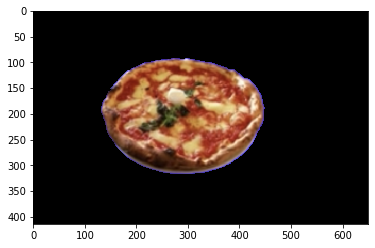

In [83]:
masked_image = np.copy(image_copy)
masked_image[mask!=0] = [0,0,0]
plt.imshow(masked_image)

# Mask and add background image

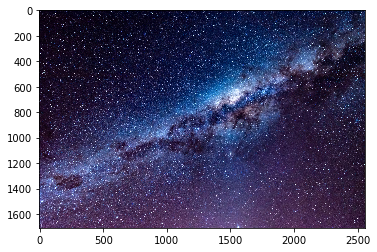

In [87]:
#load the image and convert it to RGB
background_image = cv2.imread('E:/Computer-Vision-Nanodegree-master/lesson 2/space.jpg')
background_image = cv2.cvtColor(background_image,cv2.COLOR_BGR2RGB)
plt.imshow(background_image)

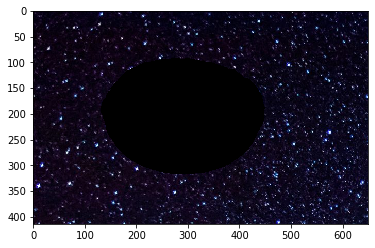

In [94]:
#crop it to the right size (514X816)
crop_background = background_image[0:414,0:650]

crop_background[mask == 0 ] = [0,0,0]
plt.imshow(crop_background)

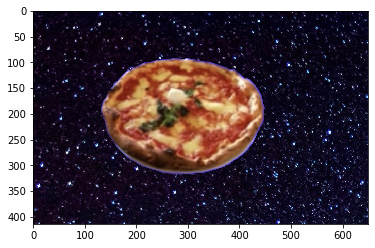

In [95]:
complete_image = crop_background+masked_image
plt.imshow(complete_image)

# Day and Night Image Classifier


We'll use a dataset composed of 200 RGB images belonging to two categories: Day and night. There are 100 images per category.

We'll build a classifier capable of labeling these images as "day" or "night" accurately, and will rely on the distinctive features of each picture.

NOTE: All images come from AMOS dataset (Archive of Many Outdoor Scenes).*

# Import resources
First, we need to import the libraries we'll use:

In [12]:
import cv2 

import os 
import glob2 as gb

import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg 

%matplotlib inline

# Training and test data
The 200 day/night images are split in training and test datasets:

* 60% of these images comprise the training data we'll use to train the classifier.
* 40% are test images, which we'll use to test our model's performance

In [55]:
image_traning = 'E:\\Computer-Vision-Nanodegree-master\\lesson 2\\DNIM\\image\\traning\\'
image_testing = 'E:\\Computer-Vision-Nanodegree-master\\lesson 2\\DNIM\\image\\testing\\'

# Loading datasets
In the following lines we'll load the training images in a variable called IMAGE_LIST. It contains a list of images and labels ("day" or "night").

For example, the first image-label pair can be accessed like this: IMAGE_LIST[0][:]

In [56]:
        
image_list  = [] 
image_label = []
for folder in os.listdir(image_traning):
    files = gb.glob(pathname=str(image_traning) + folder + '/*jpg')
    for file in files : 
        image = cv2.imread(file)
        image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        image_list.append(image)
        image_label.append(code[folder])

# Visualize standardized data

0
shape (458, 800, 3)


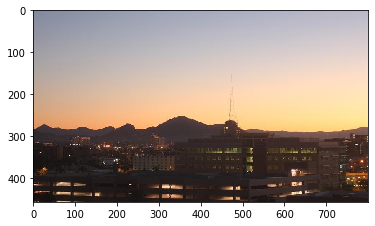

In [44]:
plt.imshow(image_list[0])
print(image_label[0])
print('shape', image_list[0].shape)


# Feature extraction
Let's create a feature that represents the image brightness. 

We'll extract the average brightness using the HSV color space.

Specially, we'll use V channel (which measures brightness), and then we'll sum all pixel values in it in order to divide that sum by the image area.

# RGB to HSV

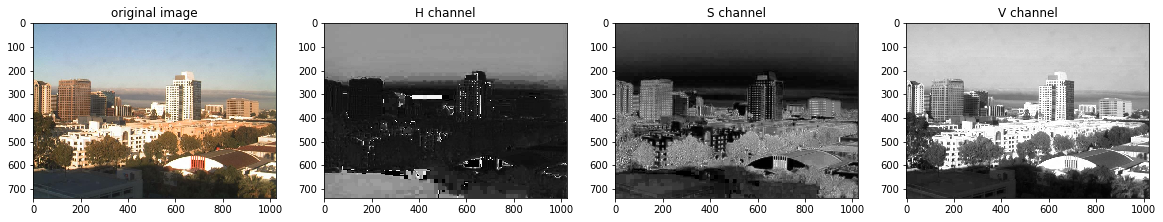

In [35]:
# conver the image from RGB to HSV , calculate the average of the brightness 

hsv = cv2.cvtColor(image_list[15],cv2.COLOR_RGB2HSV)

#HSV channels 
h = hsv[:,:,0]
s = hsv[:,:,1]
v = hsv[:,:,2]

#plot the original image and three channels 
f, (ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(20,10))
ax1.set_title('original image')
ax1.imshow(image_list[15])
ax2.set_title('H channel')
ax2.imshow(h, cmap='gray')
ax3.set_title('S channel')
ax3.imshow(s,cmap='gray')
ax4.set_title('V channel')
ax4.imshow(v,cmap='gray')

# Find average brightness using V channel

In [36]:
def average_brightness(rgb_image):
    
    #convert from rgb to hsv
    hsv = cv2.cvtColor(rgb_image,cv2.COLOR_RGB2HSV)
    
    #summition all pixel 
    sum_brighness = np.sum(hsv[:,:,2])
    
    area = 737 * 1024
    
    avg = sum_brighness/area
    
    return avg 


average brightness is :  132.23693499830392


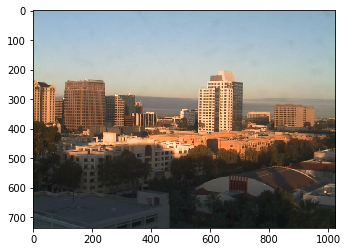

In [40]:
# look to the image to know day or night form brightness 

test_img1 = image_list[14]
avg = average_brightness(test_img1)
print('average brightness is : ' , avg)
plt.imshow(test_img1)

# Classifying and Error Visualization
In this section we'll turn our feature in a classifier that takes an standardized image to produce a label.

In [67]:
def estmate_image(rgb_image):
    
    avg =average_brightness(rgb_image)
    
    predict_label = 0 
    threshold = 50
    
    if avg>threshold:
        predict_label = 1
        
    return predict_label    

now is the  night
the true label is  night


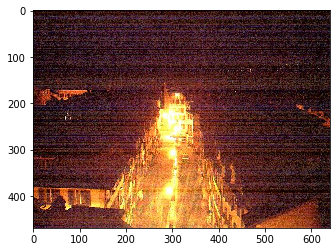

In [78]:
code = {'day':1 , 'night':0}

def get_code(n):
    for x,y in code.items():
        if n ==y:
            return x


test_img2 = image_list[232]        
label = estmate_image(test_img2)

print('now is the ' , get_code(label))
print('the true label is ' , get_code(image_label[232]))
plt.imshow(test_img2)


# accuracy

In [100]:
def calculate_acc_misclass(image_list):
    
    missclassify = 0
    i= 0
    
    for x in image_list:
        predict = estmate_image(x)
        
        if predict != image_label[i]:
            missclassify= missclassify+1
        i = i+1
    accuracy =  (len(image_list) - missclassify ) / len(image_list)
    
    return accuracy , missclassify
        
     

In [101]:
accuracy,miss = calculate_acc_misclass(image_list)


In [106]:
print('Accuracy : ', accuracy)
print('the number of miss classify is : ', miss , 'out of' , len(image_list))

Accuracy :  0.8071625344352618
the number of miss classify is :  70 out of 363
